# Generating subset of sales data for GTHA

In this script, a subset is generated from the cleaned Teranet dataset and saved as a .csv (no geometry) and a shapefile.

## 0. Preparations

#### 0.1 Import libraries

In [1]:
import pandas as pd
import geopandas as gpd

#### 0.2 Set file paths

Cleaned full Teranet dataset:

In [24]:
# set path to the cleaned Teranet dataset
teranet_path = r'Data/HHSaleHistory_cleaned_v0.9.csv'

#### 0.3 Load the full Teranet sales data from the cleaned dataset

In [3]:
%%time
teranet_sales_data = pd.read_csv(teranet_path)
print("Teranet sales data read to data frame 'teranet_sales_data'!")

Teranet sales data read to data frame 'teranet_sales_data'!
Wall time: 29.3 s


#### 0.3 Connect to ArcGIS Online

In [4]:
gis = GIS(username='stepan.o', password='Ilunl123')

In [23]:
gis.map("35 St. George street, Toronto")

MapView(layout=Layout(height='400px', width='100%'))

## 1. Find GTHA boundary in ArcGIS content library

Content found for "GTHA boundary":


<Item title:"GGH_StatsLink" type:Feature Layer Collection owner:jenbirchmore>
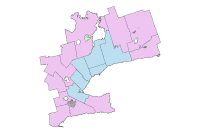

<Item title:"GTHA" type:Feature Layer Collection owner:YorkMunicipalGovt>
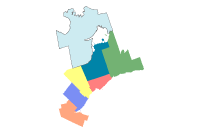

<Item title:"Geographic Boundaries" type:Web Map owner:Authoritative_iCorridor_mto_on_ca>
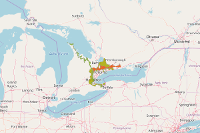

<Item title:"Geographic Boundaries" type:Web Mapping Application owner:Authoritative_iCorridor_mto_on_ca>
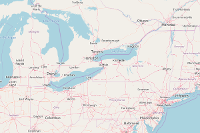

<Item title:"GTHA Boundary" type:Feature Layer Collection owner:Authoritative_iCorridor_mto_on_ca>
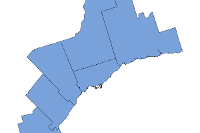

<Item title:"GTHA Base-Topo-boundary" type:Web Map owner:shivaniraghav>
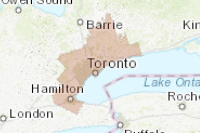

<Item title:"GTHA Base-boundary-bua" type:Web Map owner:shivaniraghav>
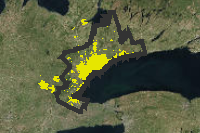

In [22]:
search_query = 'GTHA boundary'
items = gis.content.search(query=search_query,
                          sort_field='numViews',
                          sort_order='desc')
print('Content found for "{0}":'.format(search_query))
for item in items:
    display(item)

#### We will use the GGH and GTHA boundary Feature Layer Collection (`'GGH StatsLink'`) created by Jen Birchmore on Jan 16, 2018

<Item title:"GGH_StatsLink" type:Feature Layer Collection owner:jenbirchmore>
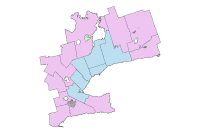

In [29]:
ggh_gtha_boundary = gis.content.search('GGH_StatsLink ')[0] # selecting the first element from list of search results
ggh_gtha_boundary

ID of the `'GGH_StatsLink'` Feature Layer:

#### Item ID of `'GGH StatsLink'` Feature Layer Collection

In [30]:
ggh_gtha_boundary.id

'4c0b9809e2a6405f908b66eb98dadb71'

#### Layers in `'GGH StatsLink'` Feature Layer Collection

In [39]:
for layer in ggh_gtha_boundary.layers:
    print(layer.properties.name)

OuterRing_Bounday
GTHA_Bounday
GGH_Boundary


In [61]:
type(ggh_gtha_boundary)

arcgis.gis.Item

#### Getting GTHA boundary from the second layer of `'GGH StatsLink'` Feature Layer Collection

In [81]:
ggh_gtha_boundary.layers[1].properties.name

'GTHA_Bounday'

In [82]:
gtha_boundary_fl = ggh_gtha_boundary.layers[1]

In [83]:
type(gtha_boundary_fl)

arcgis.features.layer.FeatureLayer

#### Getting a Feature Set with all features from the GTHA Boundary layer using an empty search query

In [84]:
gtha_boundary_fset = gtha_boundary_fl.query()

In [85]:
type(gtha_boundary_fset)

arcgis.features.feature.FeatureSet

In [99]:
len(gtha_boundary_fset)

6

#### Converting the Feature Set from GTHA Boundary layer into a GeoDataFrame

In [101]:
geometry = []
for feature in gtha_boundary_fset:
    geometry.append(feature.geometry)
len(geometry)

6

In [117]:
gtha_boundary_df = pd.DataFrame(gtha_boundary_fset.sdf)
gtha_boundary_df

,ASSESSMENT,CLASS_SUBT,CLASS_SU_1,EFFECTIVE_,GEOG_UNIT_,GEOMETRY_U,MAH_CODE,MUNICIPAL1,MUNICIPAL_,MUNICIPA_1,...,OBJECTID_1,OFFICIAL_M,OGF_ID,SHAPE,SHAPE_Leng,Shape__Area,Shape__Length,StatsLink,UPPER_TIER,UPPER_TI_1
0,2518,Single Tier Municipality,96,2008-10-22,2565,NaT,16103,,Mainland,,...,1,CITY OF HAMILTON,67906455,"{""rings"": [[[-8896472.387, 5371308.1536], [-88...",2.452683,2.124890e+09,314544.248395,http://www.omafra.gov.on.ca/english/stats/coun...,,
1,1999,Single Tier Municipality,96,2010-01-06,2565,NaT,1106,,Mainland,,...,2,CITY OF TORONTO,67906452,"{""rings"": [[[-8811122.3531, 5436758.1638], [-8...",2.108073,1.210686e+09,265238.211320,http://www.omafra.gov.on.ca/english/stats/coun...,,
2,2400,Upper Tier Municipality,70,2010-01-07,2561,NaT,14000,,Mainland,,...,3,REGIONAL MUNICIPALITY OF HALTON,67907507,"{""rings"": [[[-8881486.3568, 5398667.1604], [-8...",1.717796,1.844671e+09,221074.873757,http://www.omafra.gov.on.ca/english/stats/coun...,,
3,2000,Upper Tier Municipality,70,2010-01-07,2561,NaT,27000,,Mainland,,...,4,REGIONAL MUNICIPALITY OF YORK,67907504,"{""rings"": [[[-8826215.46875, 5516306.09375], [...",2.636287,3.406981e+09,343371.317756,http://www.omafra.gov.on.ca/english/stats/coun...,,
4,2100,Upper Tier Municipality,70,2010-01-07,2561,NaT,21000,,Mainland,,...,5,REGIONAL MUNICIPALITY OF PEEL,67907505,"{""rings"": [[[-8876099.7068, 5452861.1146], [-8...",1.876276,2.411759e+09,243534.160784,http://www.omafra.gov.on.ca/english/stats/coun...,,
5,1800,Upper Tier Municipality,70,2013-09-05,2561,2013-09-05,10000,,Mainland,,...,6,REGIONAL MUNICIPALITY OF DURHAM,67907503,"{""rings"": [[[-8807320.34375, 5433702.90625], [...",3.259268,4.983190e+09,437456.643449,http://www.omafra.gov.on.ca/english/stats/coun...,,


In [138]:
gtha_boundary_gdf = gpd.GeoDataFrame(gtha_boundary_fset.sdf)
gtha_boundary_gdf.loc[0, 'SHAPE']

AttributeError: 'Polygon' object has no attribute 'extent'

{'rings': [[[-8896472.387, 5371308.1536],
   [-8896171.3568, 5371022.7636],
   [-8896171.201, 5371022.6104],
   [-8896144.1504, 5370996.9838],
   [-8895860.6975, 5370728.2533],
   [-8895553.7897, 5370430.7349],
   [-8895430.9598, 5370308.1553],
   [-8895292.868, 5370169.2041],
   [-8895185.556, 5370061.209],
   [-8895142.9317, 5370019.4725],
   [-8894950.2822, 5369830.841],
   [-8894930.2781, 5369811.2521],
   [-8893968.2662, 5368869.1648],
   [-8893541.1333, 5368446.7467],
   [-8893521.3407, 5368427.2066],
   [-8892947.7002, 5367865.7081],
   [-8892947.344, 5367865.3406],
   [-8892940.4199, 5367858.3734],
   [-8892903.8404, 5367821.5927],
   [-8892856.4405, 5367776.0535],
   [-8892749.2399, 5367673.032],
   [-8892743.6071, 5367667.4737],
   [-8892740.2898, 5367664.1662],
   [-8892600.9623, 5367526.2805],
   [-8892591.6671, 5367517.1852],
   [-8892211.6558, 5367145.1263],
   [-8892003.3436, 5366941.2115],
   [-8891784.3002, 5366723.9962],
   [-8891735.7315, 5366675.8595],
   [-8891716.

In [127]:
polygon = gtha_boundary_df.loc[0, 'SHAPE']

In [71]:
gtha_boundary_features = gtha_boundary_fset.features

In [121]:
polygon = gtha_boundary_features[0].geometry

In [128]:
type(polygon)

arcgis.geometry._types.Polygon

In [129]:
Polygon(polygon)

KeyError: 0

In [78]:
ggh_gtha_boundary_data = ggh_gtha_boundary.get_data()
ggh_gtha_boundary_data

## 2. Add Teranet data to ArcGIS content

From a .csv file **(takes an unknown amount of time to run)**:

In [25]:
%%time
csv_path = teranet_path
csv_properties={'title':'Teranet Sales data',
                'description':'Full cleaned dataset of Teranet real estate sales data v0.9',
                'tags':'teranet'}

teranet_gis_item = gis.content.add(item_properties=csv_properties, data=csv_path)

KeyboardInterrupt: 